In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('OnlineNewsPopularity.csv')
data

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
0                  2.0        1.0  ...                0.100000   
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

In [454]:
data.describe(percentiles=[.25, .5, .75, .95, .99])

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  39644.000000     39644.000000       39644.000000      39644.000000   
mean     354.530471        10.398749         546.514731          0.548216   
std      214.163767         2.114037         471.107508          3.520708   
min        8.000000         2.000000           0.000000          0.000000   
25%      164.000000         9.000000         246.000000          0.470870   
50%      339.000000        10.000000         409.000000          0.539226   
75%      542.000000        12.000000         716.000000          0.608696   
95%      697.000000        14.000000        1407.000000          0.720908   
99%      724.000000        15.000000        2256.140000          0.802407   
max      731.000000        23.000000        8474.000000        701.000000   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       39644.000000               39644.000000  39644.000000   
mean            0.996469                   0.689175     10.883690   
std             5.231231                   3.264816     11.332017   
min             0.000000                   0.000000      0.000000   
25%             1.000000                   0.625739      4.000000   
50%             1.000000                   0.690476      8.000000   
75%             1.000000                   0.754630     14.000000   
95%             1.000000                   0.857143     30.000000   
99%             1.000000                   0.921053     56.000000   
max          1042.000000                 650.000000    304.000000   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  39644.000000  39644.000000  ...   
mean          3.293638      4.544143      1.249874  ...   
std           3.855141      8.309434      4.107855  ...   
min           0.000000      0.000000      0.000000  ...   
25%           1.000000      1.000000      0.000000  ...   
50%           3.000000      1.000000      0.000000  ...   
75%           4.000000      4.000000      1.000000  ...   
95%           9.000000     20.000000      6.000000  ...   
99%          20.000000     37.000000     21.000000  ...   
max         116.000000    128.000000     91.000000  ...   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
count            39644.000000            39644.000000            39644.000000   
mean                 0.095446                0.756728               -0.259524   
std                  0.071315                0.247786                0.127726   
min                  0.000000                0.000000               -1.000000   
25%                  0.050000                0.600000               -0.328383   
50%                  0.100000                0.800000               -0.253333   
75%                  0.100000                1.000000               -0.186905   
95%                  0.200000                1.000000                0.000000   
99%                  0.400000                1.000000                0.000000   
max                  1.000000                1.000000                0.000000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
count            39644.000000            39644.000000         39644.000000   
mean                -0.521944               -0.107500             0.282353   
std                  0.290290                0.095373             0.324247   
min                 -1.000000               -1.000000             0.000000   
25%                 -0.700000               -0.125000             0.000000   
50%                 -0.500000               -0.100000             0.150000   
75%                 -0.300000               -0.050000             0.500000   
95%                  0.000000                0.000000             1.000000   
99%                  0.000000                0.000000             1.000000   
max                  0.000000                0.000000             1.000000   

 

separate features and target

In [3]:
x = data.drop(['url',' shares'], axis=1) # select all columns except URL and TARGET
y = data[" shares"]

In [4]:
print(x.shape,y.shape)

(39644, 59) (39644,)


In [457]:
# # Separate features (X) and target variable (y)
# x = data.iloc[:, 1:-1]  # data (without url column)
# y = data.iloc[:, -1]   # Target (last column)
# x.shape

In [5]:
y

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name:  shares, Length: 39644, dtype: int64

In [6]:
x

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
0           731.0             12.0              219.0          0.663594   
1           731.0              9.0              255.0          0.604743   
2           731.0              9.0              211.0          0.575130   
3           731.0              9.0              531.0          0.503788   
4           731.0             13.0             1072.0          0.415646   
...           ...              ...                ...               ...   
39639         8.0             11.0              346.0          0.529052   
39640         8.0             12.0              328.0          0.696296   
39641         8.0             10.0              442.0          0.516355   
39642         8.0              6.0              682.0          0.539493   
39643         8.0             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs   num_videos  ...   avg_positive_polarity  \
0                  2.0        1.0          0.0  ...                0.378636   
1                  1.0        1.0          0.0  ...                0.286915   
2                  1.0        1.0          0.0  ...                0.495833   
3                  0.0        1.0          0.0  ...                0.385965   
4                 19.0       20.0          0.0  ...                0.411127   
...                ...        ...          ...  ...                     ...   
39639              7.0        1.0          1.0  ...                0.333791   
39640              7.0        3.0         48.0  ...                0.374825   
39641              1.0       12.0          1.0  ...                0.307273   
39642              1.0        1.0          0.0  ...                0.236851   
39643              1.0        0.0          2.0  ...                0.247338   

        min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                    0.100000                    0.70               -0.350000   
1                    0.033333                    0.70               -0.118750   
2                    0.100000                    1.00               -0.466667   
3                    0.136364                    0.80               -0.369697   
4                    0.033333                    1.00               -0.220192   
...                       ...                     ...                     ...   
39639                0.100000                    0.75               -0.260000   
39640                0.136364                    0.70               -0.211111   
39641                0.136364                    0.50               -0.356439   
39642                0.062500                    0.50               -0.205246   
39643                0.100000                    0.50               -0.200000   

        min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                      -0.600               -0.200000             0.500000   
1                      -0.125               -0.100000             0.000000   
2                      -0.800               -0.133333             0.000000   
3                      -0.600               -0.166667             0.

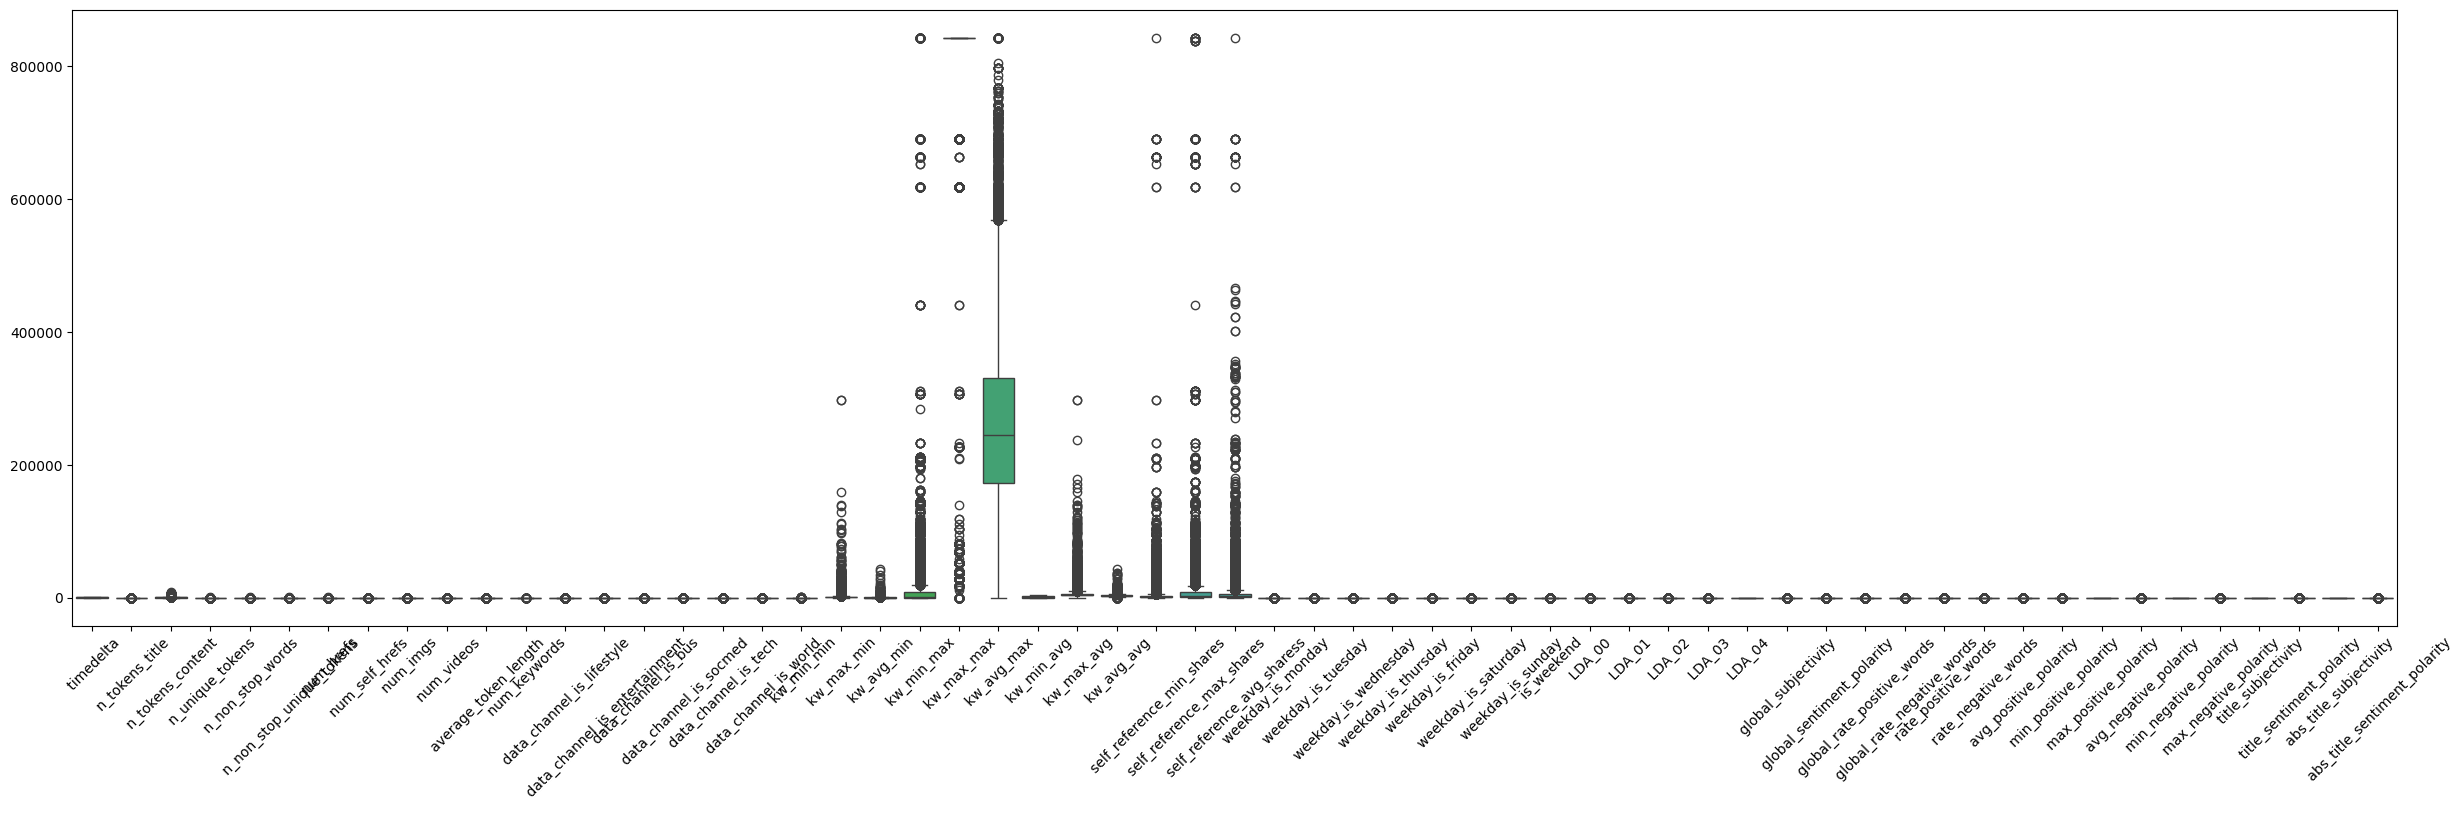

In [460]:
plt.figure(figsize=(30,8))
plt.xticks(rotation=45)
sns.boxplot(data = x)
plt.show()

### scale

In [461]:
scaler = StandardScaler()
x[:] = scaler.fit_transform(x)

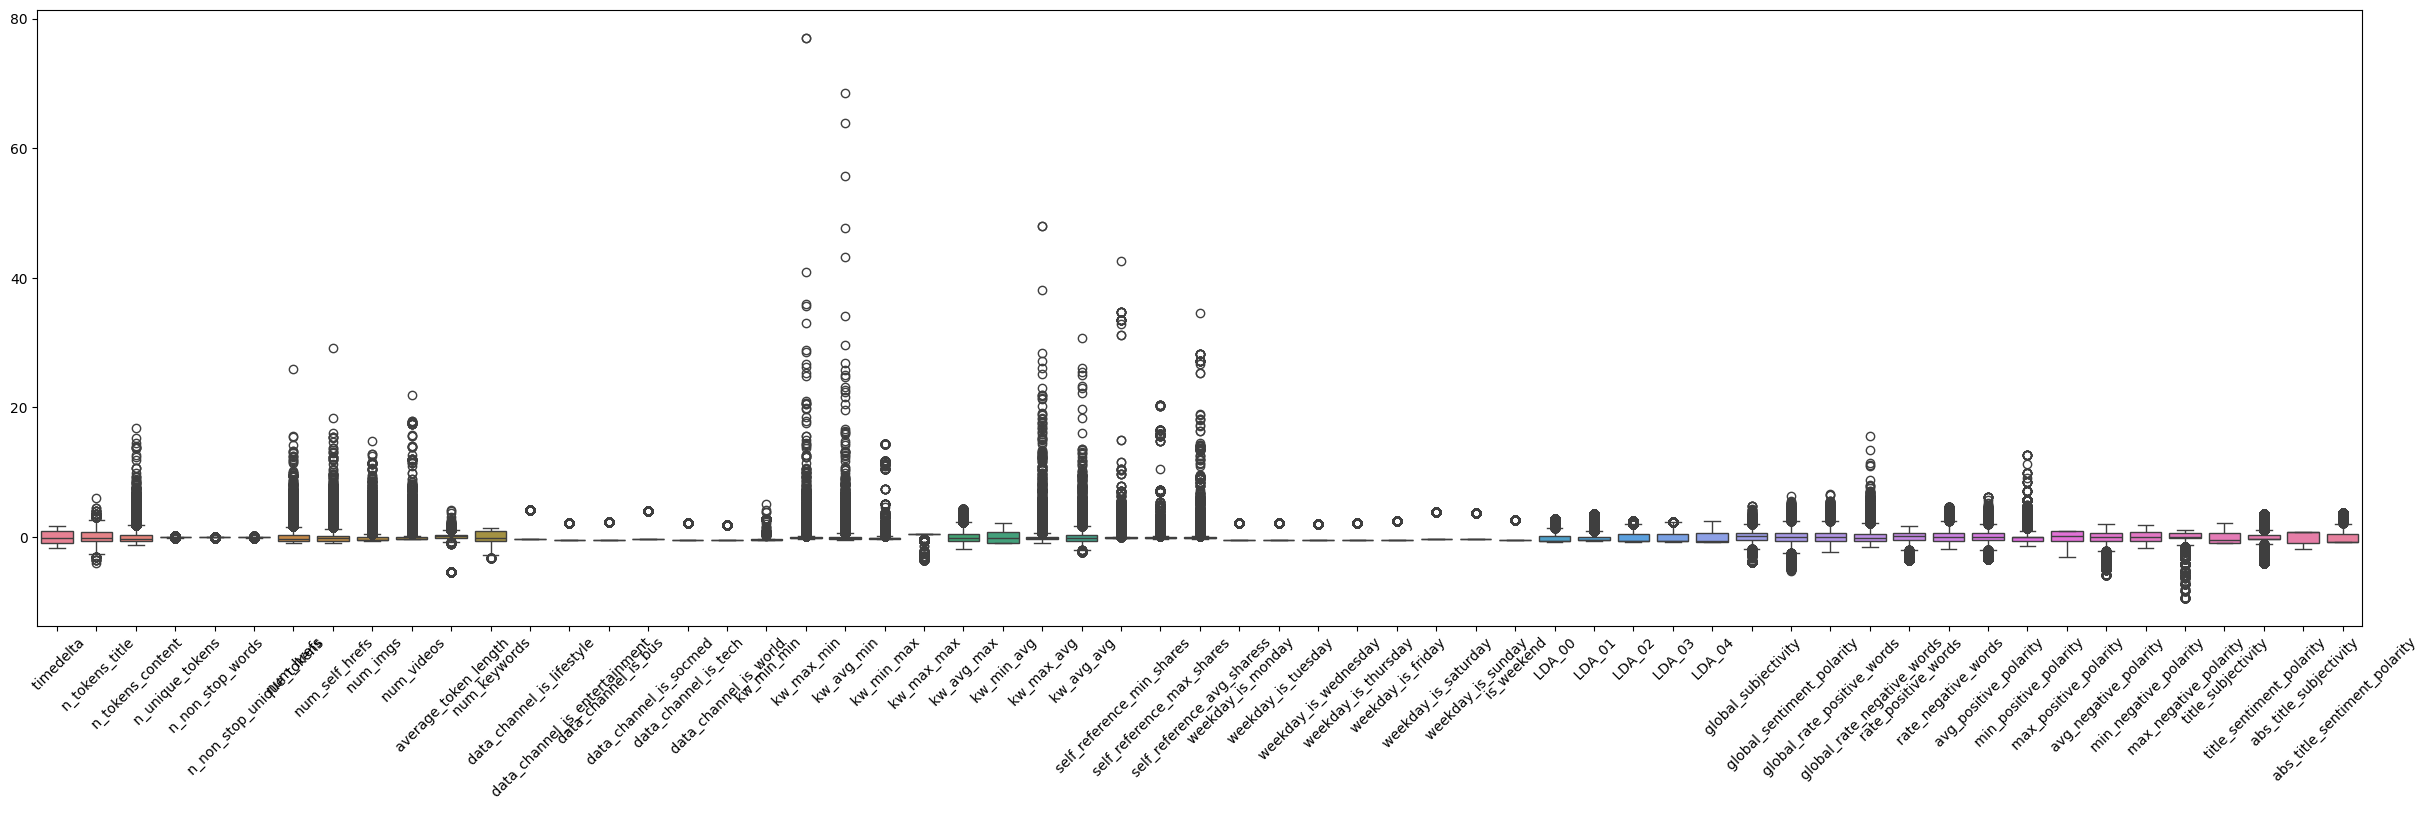

In [462]:
# Assuming 'x' is your DataFrame
# Filter out values greater than 100
x_filtered = x.apply(lambda column: column[column <= 100])

plt.figure(figsize=(30, 8))
plt.xticks(rotation=45)
sns.boxplot(data=x_filtered)
plt.show()

In [463]:
x.describe()

timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  3.964400e+04     3.964400e+04       3.964400e+04      3.964400e+04   
mean  -1.835324e-16     3.785355e-16       6.703233e-17     -1.218770e-17   
std    1.000013e+00     1.000013e+00       1.000013e+00      1.000013e+00   
min   -1.618083e+00    -3.972899e+00      -1.160078e+00     -1.557137e-01   
25%   -8.896597e-01    -6.616566e-01      -6.378980e-01     -2.196895e-02   
50%   -7.251772e-02    -1.886220e-01      -2.919004e-01     -2.553544e-03   
75%    8.753670e-01     7.574472e-01       3.597638e-01      1.717856e-02   
max    1.757880e+00     5.960828e+00       1.682755e+01      1.989545e+02   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       3.964400e+04               3.964400e+04  3.964400e+04   
mean       -3.584617e-19               2.079078e-17  8.603080e-17   
std         1.000013e+00               1.000013e+00  1.000013e+00   
min        -1.904869e-01              -2.110943e-01 -9.604492e-01   
25%         6.750748e-04              -1.943043e-02 -6.074626e-01   
50%         6.750753e-04               3.984330e-04 -2.544760e-01   
75%         6.750757e-04               2.004862e-02  2.750039e-01   
max         1.990003e+02               1.988838e+02  2.586653e+01   

        num_self_hrefs      num_imgs    num_videos  ...  \
count     39644.000000  3.964400e+04  3.964400e+04  ...   
mean          0.000000 -3.441232e-17 -5.735387e-18  ...   
std           1.000013  1.000013e+00  1.000013e+00  ...   
min          -0.854360 -5.468724e-01 -3.042682e-01  ...   
25%          -0.594963 -4.265258e-01 -3.042682e-01  ...   
50%          -0.076169 -4.265258e-01 -3.042682e-01  ...   
75%           0.183228 -6.548578e-02 -6.082908e-02  ...   
max          29.235709  1.485750e+01  2.184869e+01  ...   

        avg_positive_polarity   min_positive_polarity   max_positive_polarity  \
count            3.964400e+04            3.964400e+04            3.964400e+04   
mean             1.147077e-16           -1.147077e-17           -1.835324e-16   
std              1.000013e+00            1.000013e+00            1.000013e+00   
min             -3.384561e+00           -1.338384e+00           -3.053998e+00   
25%             -4.551464e-01           -6.372594e-01           -6.325204e-01   
50%              4.716071e-02            6.386488e-02            1.746388e-01   
75%              5.510083e-01            6.386488e-02            9.817980e-01   
max              6.181076e+00            1.268410e+01            9.817980e-01   

        avg_negative_polarity   min_negative_polarity   max_negative_polarity  \
count            3.964400e+04            3.964400e+04            3.964400e+04   
mean             5.018463e-17           -3.226155e-18            1.089723e-16   
std              1.000013e+00            1.000013e+00            1.000013e+00   
min             -5.797463e+00           -1.646847e+00           -9.358111e+00   
25%             -5.391186e-01           -6.133826e-01           -1.834899e-01   
50%              4.847016e-02            7.559352e-02            7.864213e-02   
75%              5.685644e-01            7.645696e-01            6.029062e-01   
max              2.031912e+00            1.798034e+00            1.127170e+00   

        title_subjectivity   title_sentiment_polarity  \
count         3.964400e+04               3.964400e+04   
mean         -6.524003e-17               6.308926e-17   
std           1.000013e+00               1.000013e+00   
min          -8.708066e-01              -4.036308e+00   
25%          -8.708066e-01              -2.690762e-01   
50%          -4.081910e-01              -2.690762e-01   
75%           6.712454e-01               2.960086e-01   
max           2.213297e+00               3.498156e+00   

        abs_title_subjectivity   abs_title_sentiment_polarity  
count             3.964400e+04                   3.964400e+04  
mean             -6.595695e-17                   4.552463e-1

### split data

In [23]:
data_train, data_test, data_train_t, data_test_t \
    = train_test_split(x, y, test_size=0.5, random_state=42)

### linear regression

In [24]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(data_train, data_train_t)
linear_predictions = linear_model.predict(data_test)

linear_mse = mean_squared_error(data_test_t, linear_predictions)
linear_r2 = r2_score(data_test_t, linear_predictions)

print("Linear Regression:")
print("Mean Squared Error:", linear_mse)
print("R-squared score:", linear_r2)

Linear Regression:
Mean Squared Error: 0.21849986697777324
R-squared score: 0.1230281658533372


In [466]:
print("Mean squared error of a linear moderl: %.2f" % 
      mean_squared_error(data_test_t, linear_model.predict(data_test)))
score = linear_model.score(data_test, data_test_t) #r2_score
print("Linear Regression variance score: %.2f" % score)

Mean squared error of a linear moderl: 168964193.97
Linear Regression variance score: 0.02


### add polynomial features

In [467]:
# Polynomial Regression (2nd degree)
poly = PolynomialFeatures(degree=2)
data_train_poly = poly.fit_transform(data_train)
data_test_poly = poly.transform(data_test)

poly_model = LinearRegression()
poly_model.fit(data_train_poly, data_train_t)
poly_predictions = poly_model.predict(data_test_poly)

poly_mse = mean_squared_error(data_test_t, poly_predictions)
poly_r2 = r2_score(data_test_t, poly_predictions)

print("\nPolynomial Regression (2nd degree):")
print("Mean Squared Error:", poly_mse)
print("R-squared score:", poly_r2)


Polynomial Regression (2nd degree):
Mean Squared Error: 2.046838371336879e+25
R-squared score: -1.1882467254970184e+17


### Apply RFE (recursive feature elimination)

In [468]:
sel_ = RFE(estimator=LinearRegression(), n_features_to_select=15)
sel_.fit(data_train, data_train_t)

print(sel_.support_)
print(sel_.ranking_)

[False False  True  True  True  True False False False False False False
 False False False False False False False False False False False False
  True  True  True  True False False False False False False False False
 False False  True  True  True  True  True False False False False  True
  True False False False False False False False False False False]
[18 15  1  1  1  1 21 22 42 43 19 26 27  3 23 28 29 31 33 16 17 34 45  2
  1  1  1  1  8  5  9 10 12 11 13  4  7  6  1  1  1  1  1 14 36 20 41  1
  1 38 25 35 37 44 24 40 39 32 30]


In [469]:
selected_features = data_train.columns[sel_.support_]

# Combine the selected features with the target variable
selected_data_train = pd.concat([data_train[selected_features], data_train_t], axis=1)
selected_data_test = pd.concat([data_test[selected_features], data_test_t], axis=1)


### visualize top 15 features

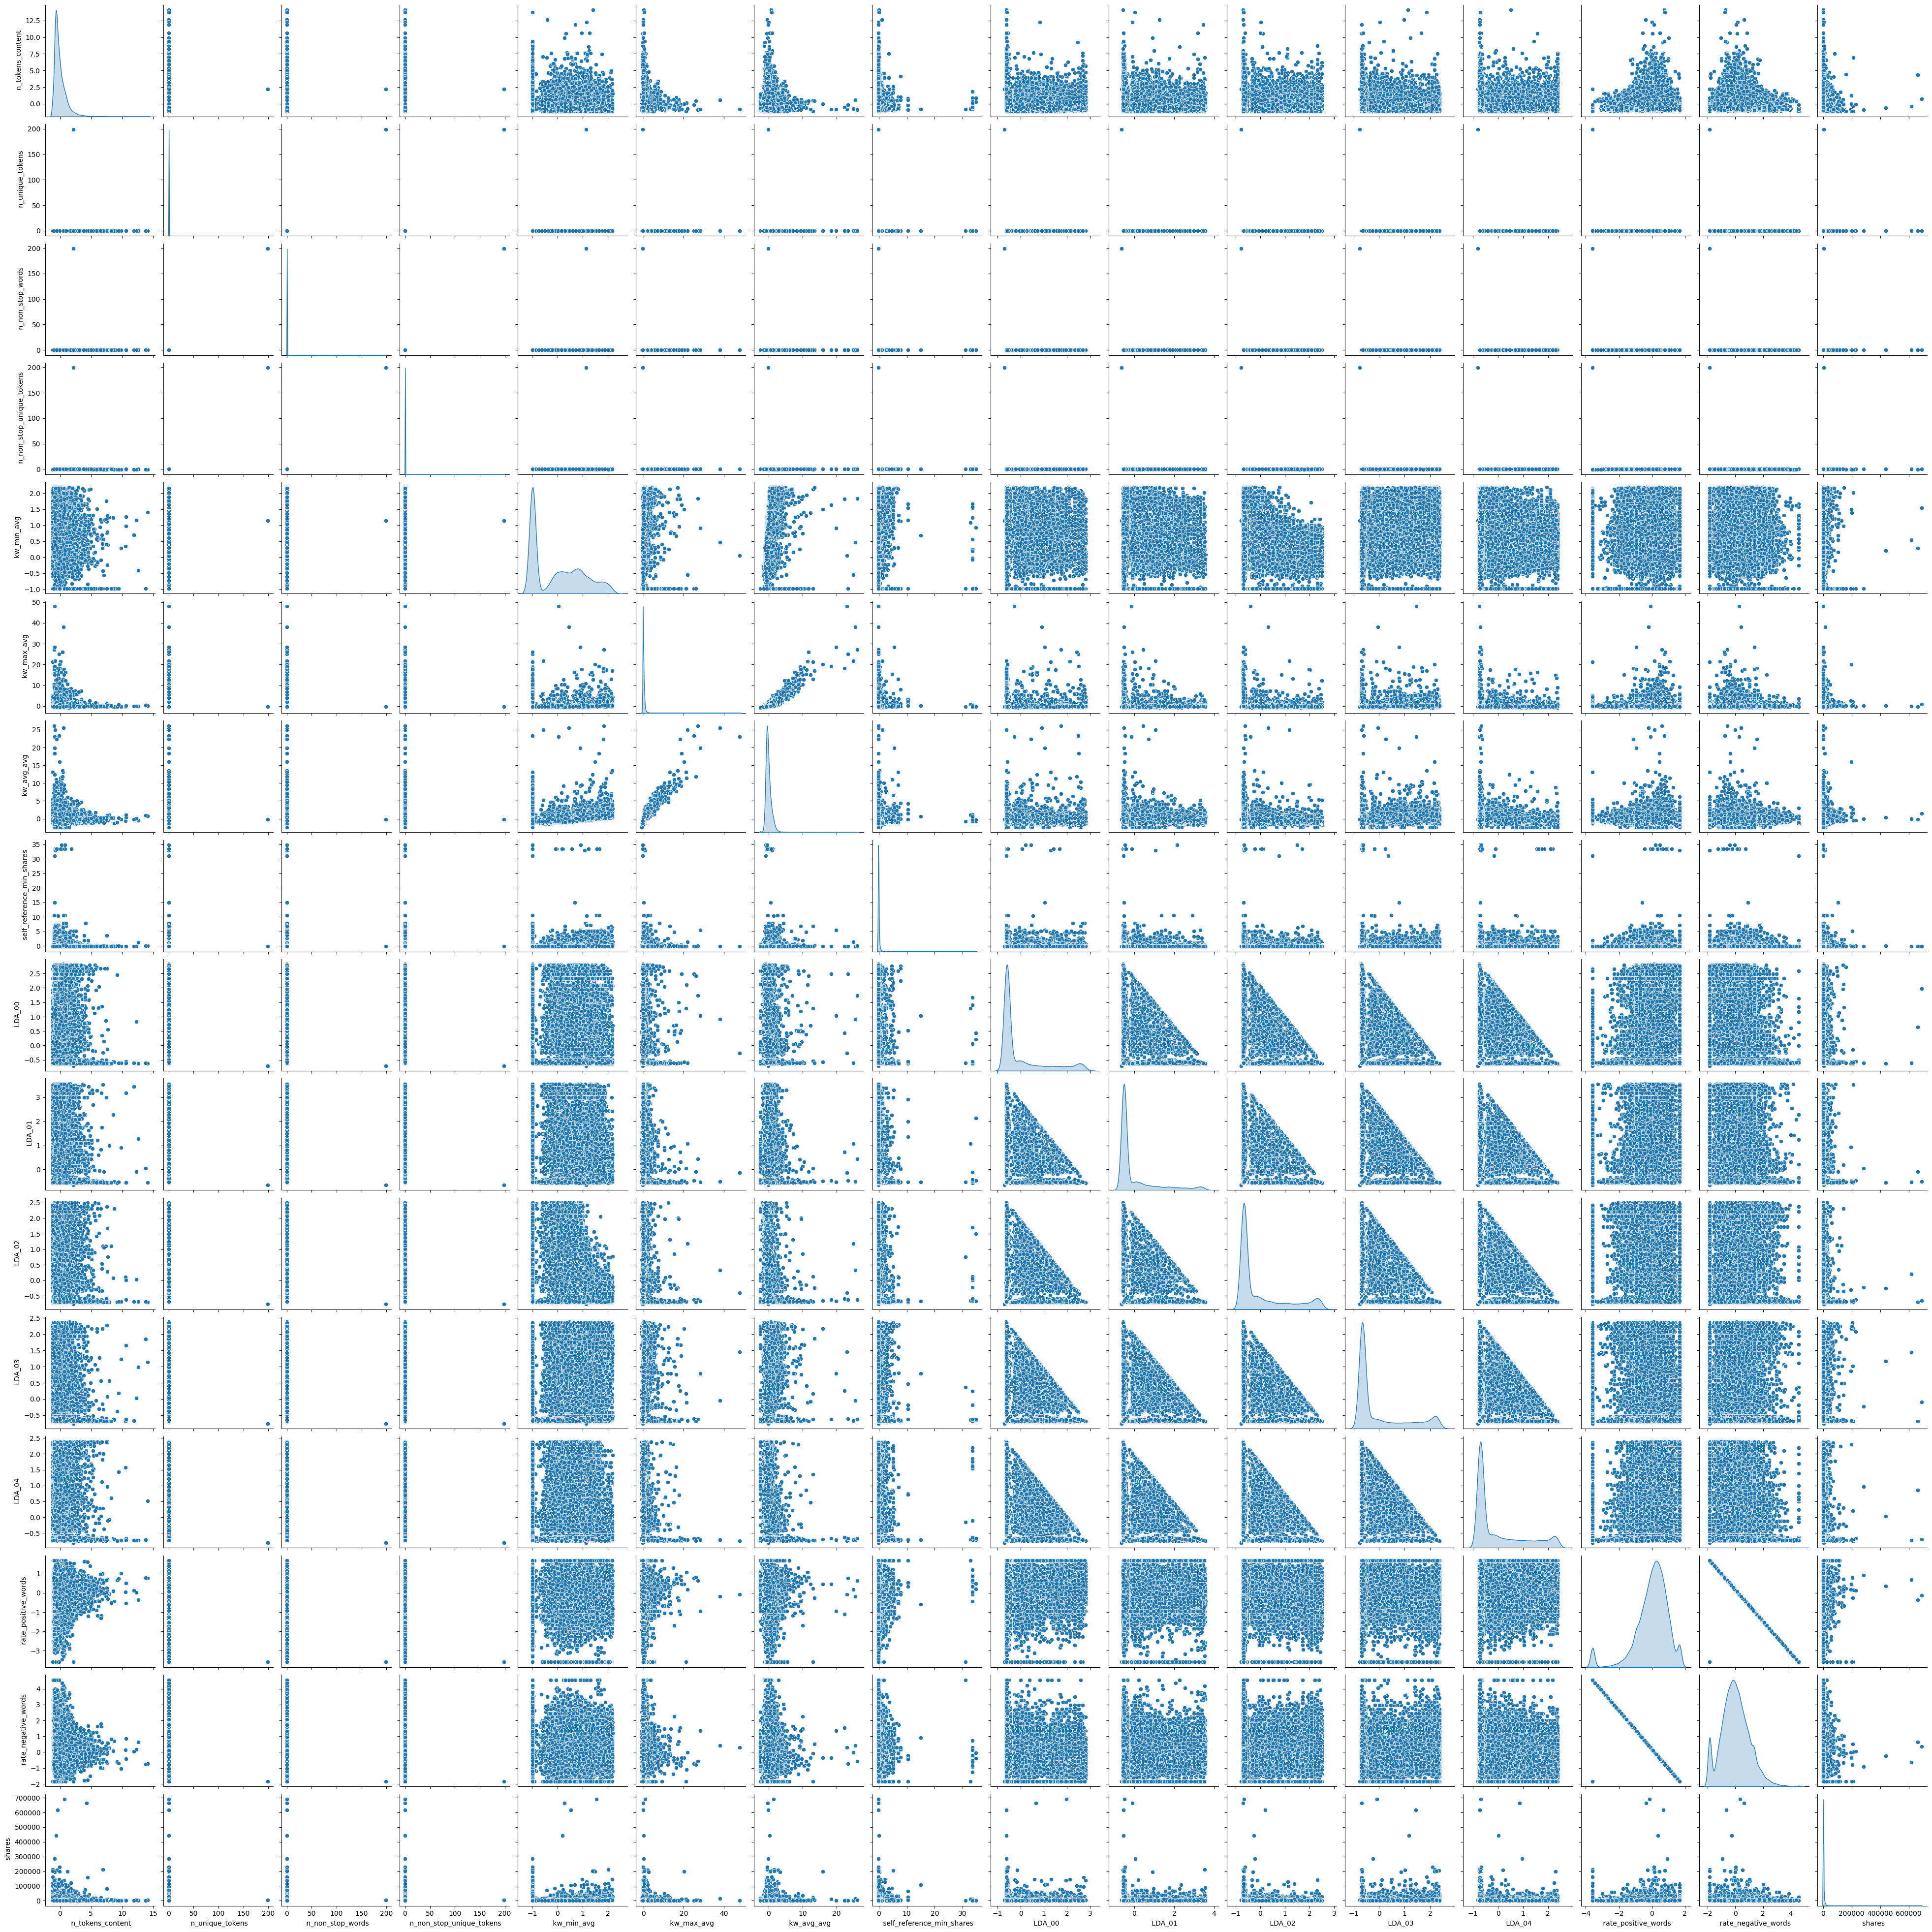

In [470]:
# Create a pair plot for the selected features
sns.pairplot(selected_data_train, diag_kind="kde")
plt.show()


### compare linear regression vs linear regression using RFE

In [471]:
print("Mean squared error of a linear moderl: %.2f" % 
      mean_squared_error(data_test_t, linear_model.predict(data_test)))
score = linear_model.score(data_test, data_test_t) #r2_score
print("Linear Regression variance score: %.2f" % score)

Mean squared error of a linear moderl: 168964193.97
Linear Regression variance score: 0.02


In [472]:
print("Mean squared error of a linear moderl using _selected_ features: %.2f" % 
      mean_squared_error(data_test_t, sel_.predict(data_test)))
score = sel_.score(data_test, data_test_t) #r2_score
print("Linear Regression variance score using _selected_ features: %.2f" % score)

Mean squared error of a linear moderl using _selected_ features: 169220478.05
Linear Regression variance score using _selected_ features: 0.02


try variable number of features

In [473]:
def train_and_evaluate_selected_features(n_features, X_train, y_train, X_test, y_test):
    sel = RFE(estimator=LinearRegression(), n_features_to_select=n_features)
    sel.fit(X_train, y_train)
    
    X_train_selected = sel.transform(X_train)
    X_test_selected = sel.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_selected)
    
    # Calculate Mean Squared Error and R-squared
    mse = mean_squared_error(y_test, y_pred)
    score = r2_score(y_test, y_pred)
    
    return mse, score

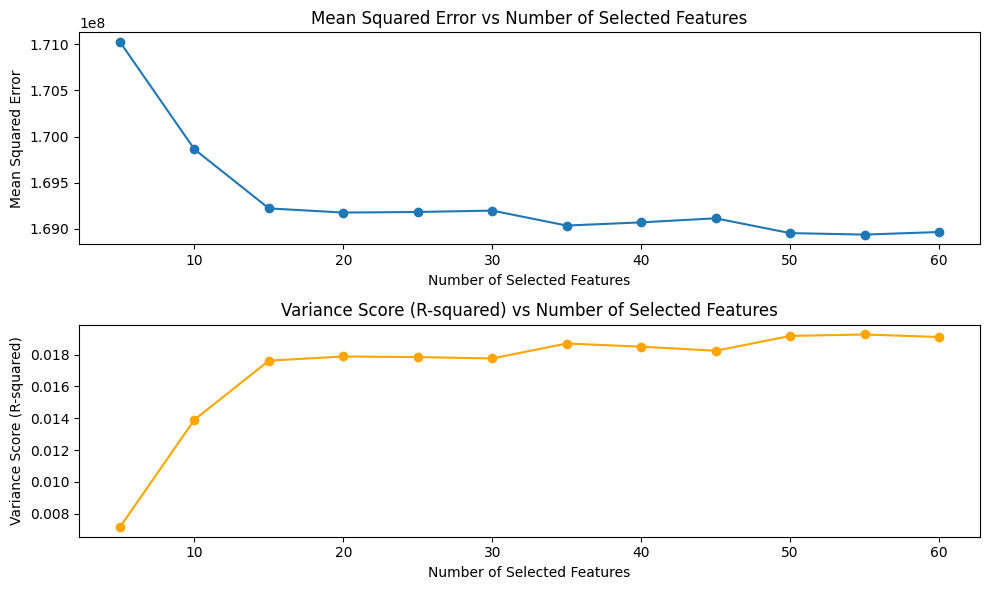

In [474]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# List of feature counts to try
feature_counts = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

# Lists to store results
mse_values = []
score_values = []

# Iterate through different numbers of selected features
for n_features in feature_counts:
    mse, score = train_and_evaluate_selected_features(n_features, 
                                                      data_train, 
                                                      data_train_t, 
                                                      data_test, 
                                                      data_test_t)
    mse_values.append(mse)
    score_values.append(score)

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot Mean Squared Error
plt.subplot(2, 1, 1)
plt.plot(feature_counts, mse_values, marker='o')
plt.title('Mean Squared Error vs Number of Selected Features')
plt.xlabel('Number of Selected Features')
plt.ylabel('Mean Squared Error')

# Plot Variance Score (R-squared)
plt.subplot(2, 1, 2)
plt.plot(feature_counts, score_values, marker='o', color='orange')
plt.title('Variance Score (R-squared) vs Number of Selected Features')
plt.xlabel('Number of Selected Features')
plt.ylabel('Variance Score (R-squared)')

plt.tight_layout()
plt.show()

In [475]:
from sklearn.linear_model import Lasso

lasso_r = Lasso(alpha=0.5, max_iter=2000)
lasso_r.fit(data_train, data_train_t)

print("Mean squared error of a linear moderl: %.2f" % 
      mean_squared_error(data_test_t, linear_model.predict(data_test)))

score = lasso_r.score(data_test, data_test_t) #r2_score
print("Lasso regression variance score: %.5f" % score)

Mean squared error of a linear moderl: 168964193.97
Lasso regression variance score: 0.01938


### cross-validation

In [476]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LinearRegression(), x, y, cv=40)
print(scores)

[-7.15990853e-02 -4.93848598e-02  1.92997597e-02  1.67744160e-03
 -1.56242664e-02  2.26672604e-03  1.41180291e-03  3.67398835e-02
  4.96521558e-02  4.96273924e-03 -1.13111740e-02  6.55124249e-02
  1.76611641e-02  6.93144458e-02  2.34279791e-02  7.08811583e-02
  8.60331646e-03  2.76972948e-02  2.75984729e-02  3.50101992e-02
  4.58774075e-02  4.88549561e-02  6.21225669e-02  3.57241912e-03
 -3.24106255e-03  5.20073009e-02  4.05266851e-02  6.39192895e-02
  4.25747810e-02  4.61886121e-02  1.17254777e-02 -1.18669099e+18
  3.23440096e-02  2.93273243e-02 -2.72169696e-02  1.24921586e-02
 -8.53405371e-03  2.03011570e-02  4.66278894e-02  2.55898990e-02]


searching best params for Lasso

In [477]:
from sklearn.model_selection import GridSearchCV
# Przykładowe wartości alpha do przetestowania
alphas = [0.0001, 0.001, 0.01, 0.1, 1]

# Definicja modelu Lasso
lasso = Lasso()

# Parametry do przetestowania
param_grid = {'alpha': alphas}

# Użycie GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(x, y)

# Wydrukowanie najlepszych parametrów
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'alpha': 0.01}


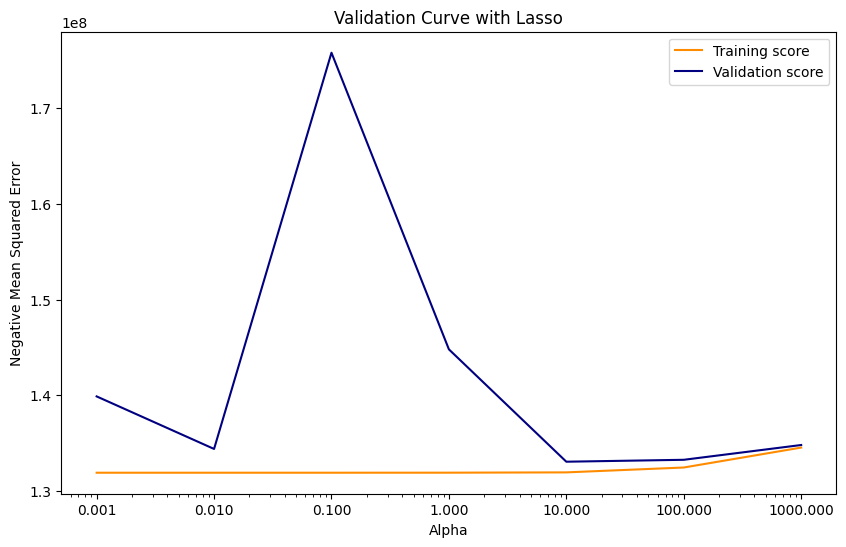

In [478]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import validation_curve

# example alpha values
alphas = np.logspace(-3, 3, 7)
lasso = Lasso()


train_scores, valid_scores = validation_curve(
    lasso, x, y, param_name="alpha", param_range=alphas,
    cv=5, scoring="neg_mean_squared_error", n_jobs=-1
)

# mean scores
train_scores_mean = -np.mean(train_scores, axis=1)
valid_scores_mean = -np.mean(valid_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.semilogx(alphas, train_scores_mean, label="Training score", color="darkorange")
plt.semilogx(alphas, valid_scores_mean, label="Validation score", color="navy")
plt.title("Validation Curve with Lasso")
plt.xlabel("Alpha")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.xticks(alphas, [f"{alpha:.3f}" for alpha in alphas])
plt.show()


as we can see alpha = 0.01 is best value

In [479]:
lasso_r = Lasso(alpha=0.01)
lasso_r.fit(data_train, data_train_t)

score = lasso_r.score(data_test, data_test_t) #r2_score
print("Lasso regression variance score: %.5f" % score)

Lasso regression variance score: 0.01936


### plot predicted vs actual

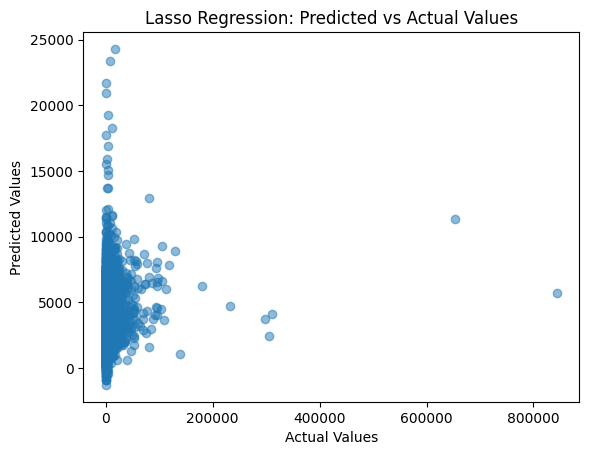

In [480]:
# Scatter plot for Lasso regression
plt.scatter(data_test_t, lasso_r.predict(data_test), alpha=0.5)
plt.title('Lasso Regression: Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## try to select columns using correlation

In [481]:
# Concatenate features and target variable
data = pd.concat([x, y], axis=1)

# Calculate correlations
correlations = data.corr()[' shares'].abs().sort_values(ascending=False)

# Select the top N features based on correlation
top_features = correlations[1:11].index  # Excluding the target variable itself

# Extract selected features
selected_features = x[top_features]
selected_features

kw_avg_avg    LDA_03   kw_max_avg    LDA_02  \
0        -2.379014 -0.618276    -0.927595 -0.624921   
1        -2.379014 -0.588335    -0.927595 -0.589153   
2        -2.379014 -0.645137    -0.927595 -0.648502   
3        -2.379014 -0.660140    -0.927595  0.986490   
4        -2.379014 -0.661269    -0.927595 -0.665431   
...            ...       ...          ...       ...   
39639    -0.079463 -0.673368    -0.271016 -0.229033   
39640     0.209237  1.551102    -0.030669  0.055097   
39641     0.812194  1.422908     0.200609 -0.677368   
39642    -1.030216 -0.622546    -0.372679  2.210472   
39643     0.122181 -0.586445    -0.335099 -0.589493   

        self_reference_avg_sharess   self_reference_min_shares  \
0                        -0.243926                   -0.177459   
1                        -0.264412                   -0.202587   
2                        -0.226496                   -0.156079   
3                        -0.264412                   -0.202587   
4                        -0.134259                   -0.174976   
...                            ...                         ...   
39639                     1.265194                    0.374966   
39640                    -0.177675                   -0.096196   
39641                    -0.206588                   -0.131660   
39642                    -0.245743                   -0.179688   
39643                    -0.177675                   -0.096196   

        data_channel_is_world   self_reference_max_shares   num_hrefs  \
0                   -0.519566                   -0.239676   -0.607463   
1                   -0.519566                   -0.251766   -0.695709   
2                   -0.519566                   -0.229390   -0.695709   
3                   -0.519566                   -0.251766   -0.166229   
4                   -0.519566                    0.138221    0.716237   
...                       ...                         ...         ...   
39639               -0.519566                    0.918194   -0.166229   
39640               -0.519566                   -0.200580   -0.166229   
39641               -0.519566                   -0.217642    1.157470   
39642                1.924682                   -0.240749   -0.077983   
39643               -0.519566                   -0.200580   -0.872203   

        kw_avg_max  
0        -1.919178  
1        -1.919178  
2        -1.919178  
3        -1.919178  
4        -1.919178  
...            ...  
39639     0.856255  
39640    -0.490718  
39641     0.270673  
39642    -0.034655  
39643     0.791396  

[39644 rows x 10 columns]

## trying random forest

In [18]:
# Assuming 'data' is your DataFrame
x = data.iloc[:, 1:-1]  # Features (excluding 'url' and 'shares' columns)
y = (data[' shares'] >= 1400).astype(int)  # Binary labels based on the threshold

# Split the data into training and testing sets
data_train, data_test, data_train_t, data_test_t = train_test_split(x, y, test_size=0.3, random_state=42)


In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(data_train, data_train_t)

RandomForestClassifier(random_state=42)

In [20]:
# Make predictions on the test data
predictions = rf_classifier.predict(data_test)

In [21]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate accuracy
accuracy = accuracy_score(data_test_t, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Evaluate other classification metrics
print(classification_report(data_test_t, predictions))

Accuracy: 0.67
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      5591
           1       0.67      0.73      0.70      6303

    accuracy                           0.67     11894
   macro avg       0.67      0.67      0.67     11894
weighted avg       0.67      0.67      0.67     11894



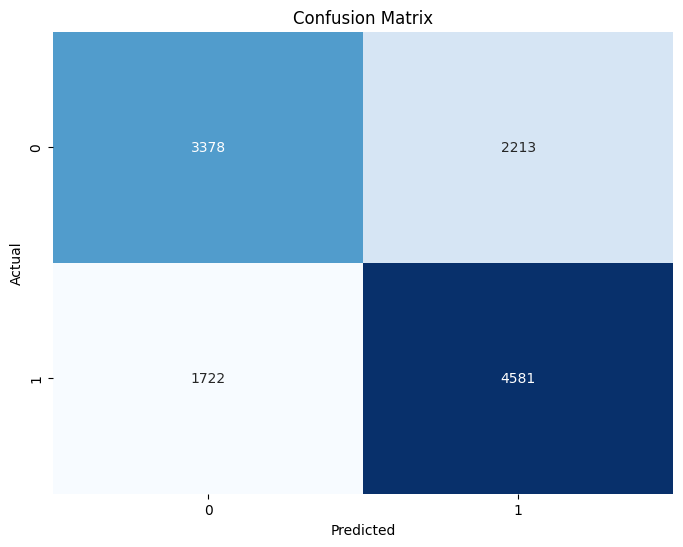

In [22]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(data_test_t, predictions)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()